In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
colors=["#9C92A8", "#A1DF11","#A0790E",'#E86262',"#11CC3F","#5D13A3"]

In [ ]:
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)

In [2]:
# Load data
cases = pd.read_csv("/home/hesham/NMG/8-25/cleaned_ncr_data8-25.csv")

In [3]:
# تحليل البيانات حسب الشهر وحالة Follow_Up
monthly_cases = cases.groupby(['Month', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
print("Cases by Month and Follow_Up status:")
print(monthly_cases)
print("\n" + "="*50 + "\n")

Cases by Month and Follow_Up status:
Follow_Up  Closed  Opened
Month                    
أغسطس-25       11       1
يوليو-25       12       1




In [4]:
# فصل البيانات حسب الشهر
august_cases = cases[cases['Month'] == 'أغسطس-25']
july_cases = cases[cases['Month'] == 'يوليو-25']

In [5]:
# تحليل البيانات حسب القسم لحالات يوليو
july_dept_cases = july_cases.groupby(['Department', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
print("July Cases by Department and Follow_Up status:")
print(july_dept_cases)
print("\n" + "="*50 + "\n")

July Cases by Department and Follow_Up status:
Follow_Up               Closed  Opened
Department                            
Administrative Affairs       2       0
Engineering Department       1       0
IT                           0       1
Production                   1       0
Sheet Printing               1       0
Web                          7       0




In [6]:
# فصل البيانات حسب الشهر
august_cases = cases[cases['Month'] == 'أغسطس-25']
july_cases = cases[cases['Month'] == 'يوليو-25']

In [7]:
# تحليل البيانات حسب القسم لحالات أغسطس
august_dept_cases = august_cases.groupby(['Department', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
plt.gcf().set_facecolor("#f0f0f0")
print("August Cases by Department and Follow_Up status:")
print(august_dept_cases)
print("\n" + "="*50 + "\n")

August Cases by Department and Follow_Up status:
Follow_Up               Closed  Opened
Department                            
Administrative Affairs       2       0
Binding                      2       0
Engineering Department       4       0
Stores                       1       0
Web                          2       1




<Figure size 640x480 with 0 Axes>

In [8]:
# تحليل البيانات حسب المرسل وحالة Follow_Up لأغسطس
august_reporter_cases = august_cases.groupby(['Reporter_Name', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
print("August Cases by Reporter and Follow_Up status:")
print(august_reporter_cases)
print("\n" + "="*50 + "\n")

August Cases by Reporter and Follow_Up status:
Follow_Up                Closed  Opened
Reporter_Name                          
Ahmed Morsi Morsi             5       0
Ahmed Saad Tolba              1       0
Alaa Antar Mohamed            1       0
Ali Salah Ali                 1       1
Karim Magdy Ahmed             1       0
Mohamed Mahmoud Abdelal       1       0
Mohamed Moussa Ismail         1       0




In [9]:
# تحليل البيانات حسب المرسل وحالة Follow_Up ليوليو
july_reporter_cases = july_cases.groupby(['Reporter_Name', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
print("July Cases by Reporter and Follow_Up status:")
print(july_reporter_cases)
print("\n" + "="*50 + "\n")

July Cases by Reporter and Follow_Up status:
Follow_Up              Closed  Opened
Reporter_Name                        
Ahmed Morsi Morsi           9       0
Ahmed Saad Tolba            1       0
Ali Salah Ali               1       0
Mohamed Moussa Ismail       1       1




<Figure size 1400x800 with 0 Axes>

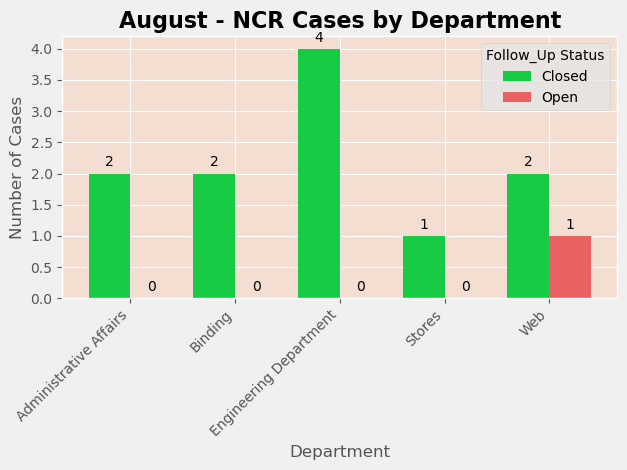

In [10]:
# إنشاء الرسومات البيانية لأغسطس
# 1. رسم بياني للحالات حسب القسم لأغسطس
plt.figure(figsize=(14, 8))
ax1 = august_dept_cases.plot(kind='bar', color=['#17CB44', '#E86262'], width=0.8)
plt.title('August - NCR Cases by Department', fontsize=16, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(['Closed', 'Open'], title='Follow_Up Status')
plt.tight_layout()

# تنسيق الخلفية
ax1.set_facecolor("#f3ded1")
plt.gcf().set_facecolor("#f0f0f0")

# إضافة القيم على الأعمدة
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.show()

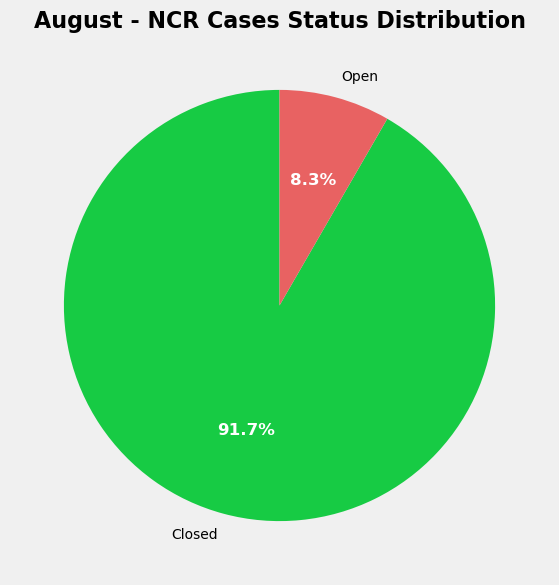

In [11]:
# 2. رسم بياني للنسبة المئوية للحالات في أغسطس
august_status_counts = [
    august_cases['Follow_Up'].value_counts().get('Closed', 0),
    august_cases['Follow_Up'].value_counts().get('Opened', 0)
]
august_labels = ['Closed', 'Open']
august_colors = ['#17CB44', '#E86262']

plt.figure(figsize=(10, 7))
ax2 = plt.subplot(111)
wedges, texts, autotexts = ax2.pie(august_status_counts, labels=august_labels, autopct='%1.1f%%', 
                                  colors=august_colors, startangle=90)
plt.title('August - NCR Cases Status Distribution', fontsize=16, fontweight='bold')

# تنسيق الخلفية
plt.gcf().set_facecolor("#f0f0f0")

# جعل النسب المئوية أكثر وضوحاً
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.show()

<Figure size 1400x800 with 0 Axes>

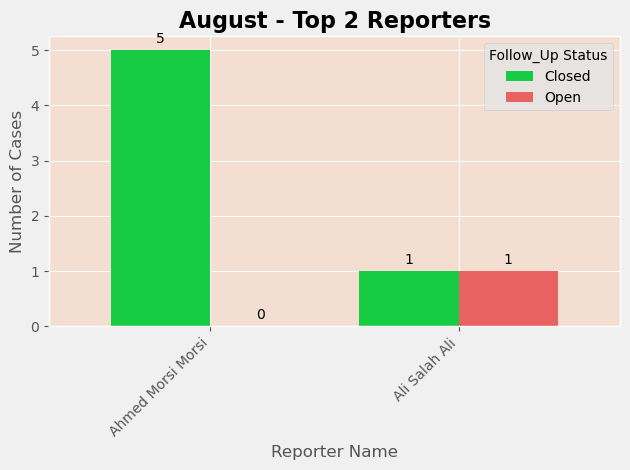

In [12]:
# 3. رسم بياني للمرسلين في أغسطس (لأعلى 10 مرسلين)
if not august_reporter_cases.empty:
    august_top_reporters = august_reporter_cases.sum(axis=1).sort_values(ascending=False).head(2).index
    august_top_reporter_cases = august_reporter_cases.loc[august_top_reporters]

    plt.figure(figsize=(14, 8))
    ax3 = august_top_reporter_cases.plot(kind='bar', color=['#17CB44', '#E86262'], width=0.8)
    plt.title('August - Top 2 Reporters', fontsize=16, fontweight='bold')
    plt.xlabel('Reporter Name')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45, ha='right')
    plt.legend(['Closed', 'Open'], title='Follow_Up Status')
    plt.tight_layout()

    # تنسيق الخلفية
    ax3.set_facecolor("#f3ded1")
    plt.gcf().set_facecolor("#f0f0f0")

    # إضافة القيم على الأعمدة
    for container in ax3.containers:
        ax3.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

    plt.show()

<Figure size 1400x800 with 0 Axes>

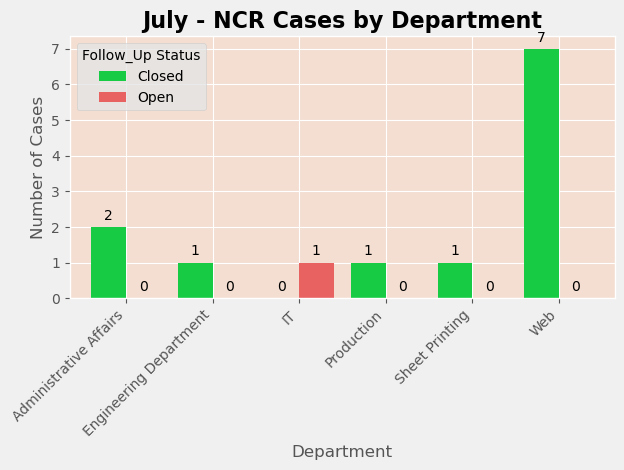

In [13]:
# إنشاء الرسومات البيانية ليوليو
# 4. رسم بياني للحالات حسب القسم ليوليو
plt.figure(figsize=(14, 8))
ax4 = july_dept_cases.plot(kind='bar', color=['#17CB44', '#E86262'], width=0.8)
plt.title('July - NCR Cases by Department', fontsize=16, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(['Closed', 'Open'], title='Follow_Up Status')
plt.tight_layout()

# تنسيق الخلفية
ax4.set_facecolor("#f3ded1")
plt.gcf().set_facecolor("#f0f0f0")

# إضافة القيم على الأعمدة
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.show()

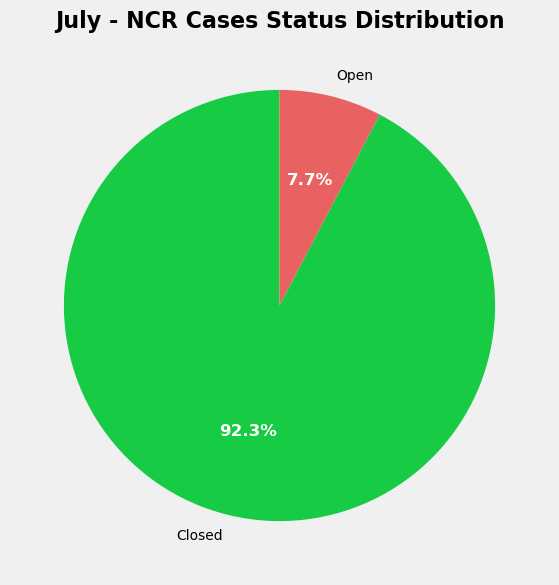

In [14]:
# 5. رسم بياني للنسبة المئوية للحالات في يوليو
july_status_counts = [
    july_cases['Follow_Up'].value_counts().get('Closed', 0),
    july_cases['Follow_Up'].value_counts().get('Opened', 0)
]
july_labels = ['Closed', 'Open']
july_colors = ['#17CB44', '#E86262']

plt.figure(figsize=(10, 7))
ax5 = plt.subplot(111)
wedges, texts, autotexts = ax5.pie(july_status_counts, labels=july_labels, autopct='%1.1f%%', 
                                  colors=july_colors, startangle=90)
plt.title('July - NCR Cases Status Distribution', fontsize=16, fontweight='bold')

# تنسيق الخلفية
plt.gcf().set_facecolor("#f0f0f0")

# جعل النسب المئوية أكثر وضوحاً
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.show()

<Figure size 1400x800 with 0 Axes>

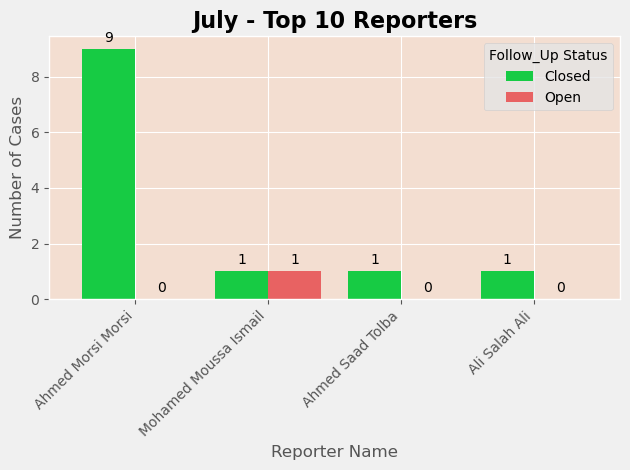

In [15]:
# 6. رسم بياني للمرسلين في يوليو (لأعلى 10 مرسلين)
if not july_reporter_cases.empty:
    july_top_reporters = july_reporter_cases.sum(axis=1).sort_values(ascending=False).head(10).index
    july_top_reporter_cases = july_reporter_cases.loc[july_top_reporters]

    plt.figure(figsize=(14, 8))
    ax6 = july_top_reporter_cases.plot(kind='bar', color=['#17CB44', '#E86262'], width=0.8)
    plt.title('July - Top 10 Reporters', fontsize=16, fontweight='bold')
    plt.xlabel('Reporter Name')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45, ha='right')
    plt.legend(['Closed', 'Open'], title='Follow_Up Status')
    plt.tight_layout()

    # تنسيق الخلفية
    ax6.set_facecolor("#f3ded1")
    plt.gcf().set_facecolor("#f0f0f0")

    # إضافة القيم على الأعمدة
    for container in ax6.containers:
        ax6.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

    plt.show()

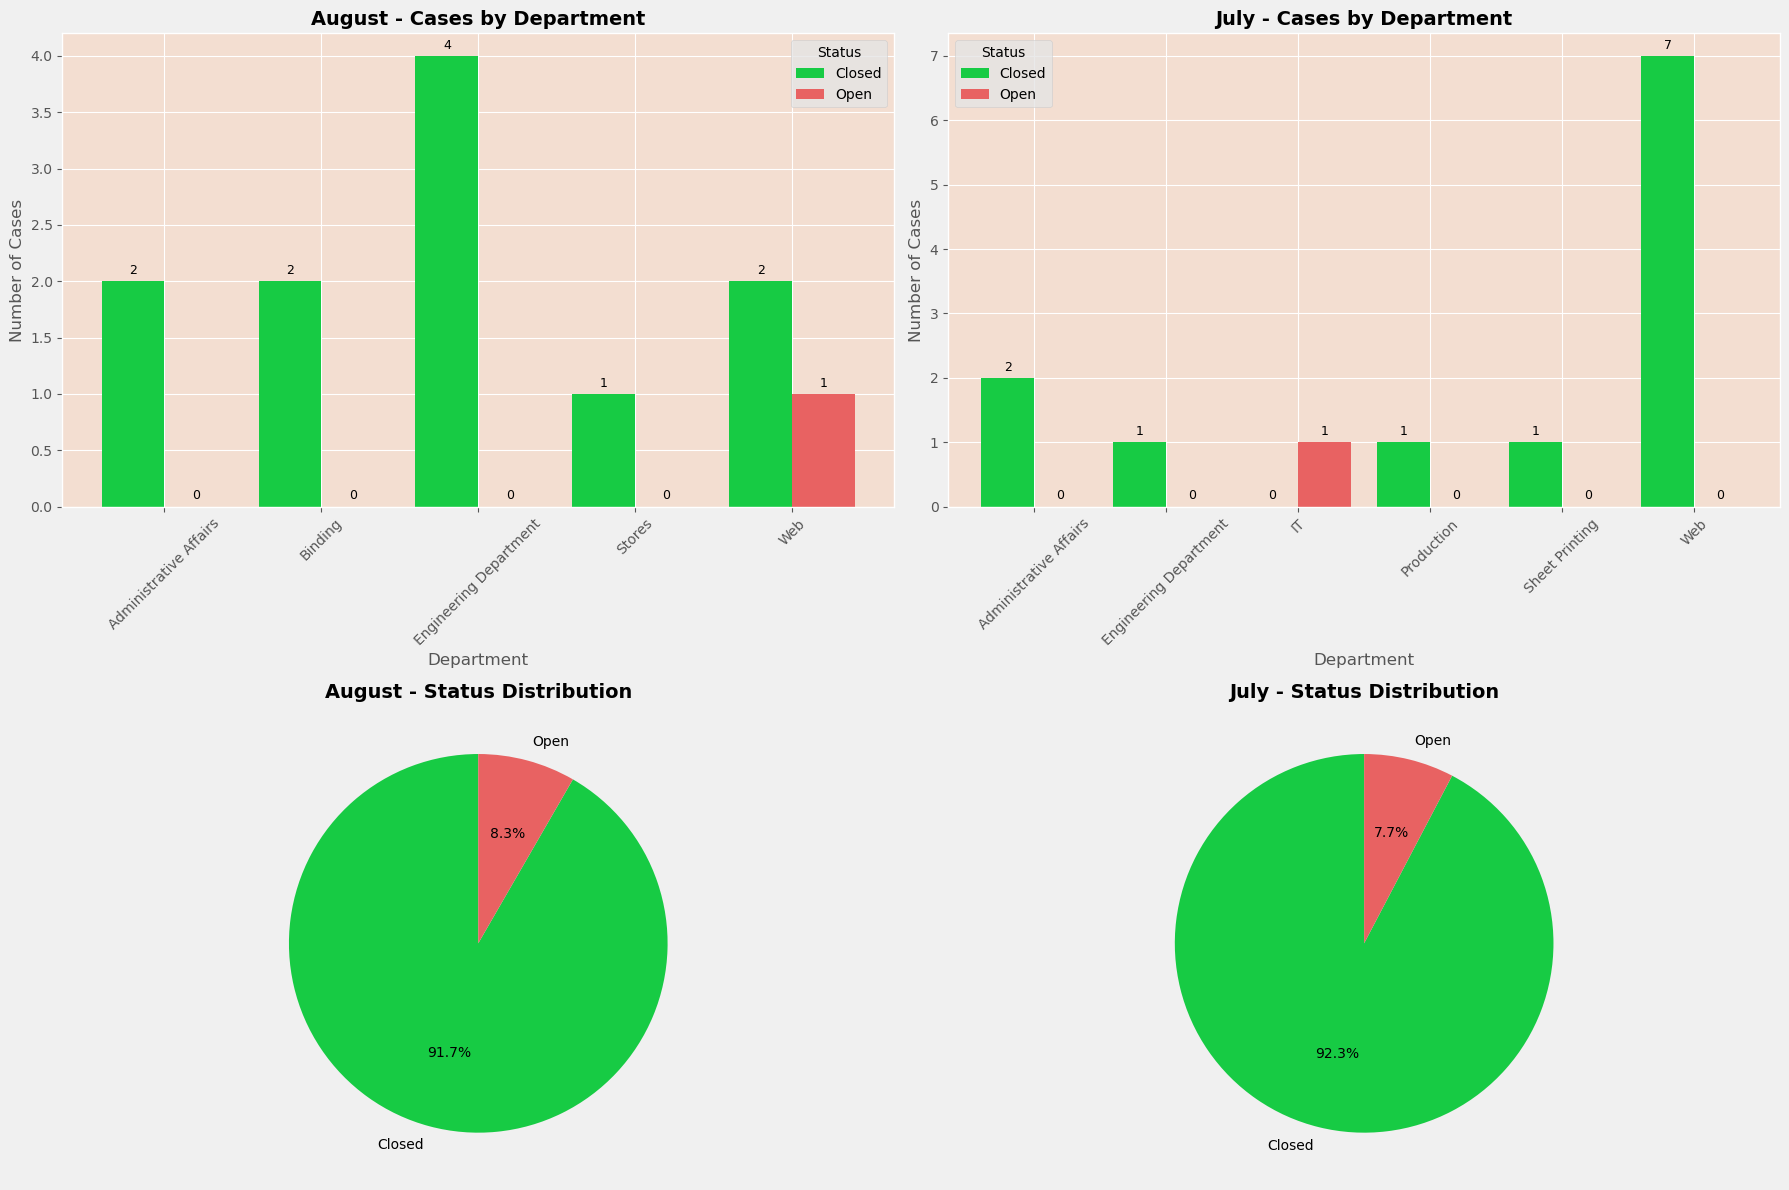

In [16]:
# 7. رسم مقارن بين الشهرين
fig, ((ax7, ax8), (ax9, ax10)) = plt.subplots(2, 2, figsize=(18, 12))

# الحالات حسب القسم - أغسطس
august_dept_cases.plot(kind='bar', ax=ax7, color=['#17CB44', '#E86262'], width=0.8)
ax7.set_title('August - Cases by Department', fontsize=14, fontweight='bold')
ax7.set_ylabel('Number of Cases')
ax7.tick_params(axis='x', rotation=45)
ax7.legend(['Closed', 'Open'], title='Status')

# الحالات حسب القسم - يوليو
july_dept_cases.plot(kind='bar', ax=ax8, color=['#17CB44', '#E86262'], width=0.8)
ax8.set_title('July - Cases by Department', fontsize=14, fontweight='bold')
ax8.set_ylabel('Number of Cases')
ax8.tick_params(axis='x', rotation=45)
ax8.legend(['Closed', 'Open'], title='Status')

# النسبة المئوية - أغسطس
ax9.pie(august_status_counts, labels=august_labels, autopct='%1.1f%%', colors=august_colors, startangle=90)
ax9.set_title('August - Status Distribution', fontsize=14, fontweight='bold')

# النسبة المئوية - يوليو
ax10.pie(july_status_counts, labels=july_labels, autopct='%1.1f%%', colors=july_colors, startangle=90)
ax10.set_title('July - Status Distribution', fontsize=14, fontweight='bold')

# تنسيق الخلفية
for ax in [ax7, ax8, ax9, ax10]:
    ax.set_facecolor("#f3ded1")
fig.set_facecolor("#f0f0f0")

# إضافة القيم على الأعمدة
for ax in [ax7, ax8]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

In [17]:
# عرض إحصائيات مفصلة
print("DETAILED STATISTICS:")
print("="*50)

print("\nAUGUST STATISTICS:")
print(f"Total August Cases: {len(august_cases)}")
print(f"August Closed Cases: {august_status_counts[0]} ({august_status_counts[0]/len(august_cases)*100:.1f}%)")
print(f"August Open Cases: {august_status_counts[1]} ({august_status_counts[1]/len(august_cases)*100:.1f}%)")
print(f"Departments in August: {august_cases['Department'].nunique()}")
print(f"Reporters in August: {august_cases['Reporter_Name'].nunique()}")

print("\nJULY STATISTICS:")
print(f"Total July Cases: {len(july_cases)}")
print(f"July Closed Cases: {july_status_counts[0]} ({july_status_counts[0]/len(july_cases)*100:.1f}%)")
print(f"July Open Cases: {july_status_counts[1]} ({july_status_counts[1]/len(july_cases)*100:.1f}%)")
print(f"Departments in July: {july_cases['Department'].nunique()}")
print(f"Reporters in July: {july_cases['Reporter_Name'].nunique()}")

print("\nOVERALL STATISTICS:")
print(f"Total Cases: {len(cases)}")
print(f"Overall Closed Cases: {august_status_counts[0] + july_status_counts[0]}")
print(f"Overall Open Cases: {august_status_counts[1] + july_status_counts[1]}")
print(f"Total Departments: {cases['Department'].nunique()}")
print(f"Total Reporters: {cases['Reporter_Name'].nunique()}")

DETAILED STATISTICS:

AUGUST STATISTICS:
Total August Cases: 12
August Closed Cases: 11 (91.7%)
August Open Cases: 1 (8.3%)
Departments in August: 5
Reporters in August: 7

JULY STATISTICS:
Total July Cases: 13
July Closed Cases: 12 (92.3%)
July Open Cases: 1 (7.7%)
Departments in July: 6
Reporters in July: 4

OVERALL STATISTICS:
Total Cases: 25
Overall Closed Cases: 23
Overall Open Cases: 2
Total Departments: 8
Total Reporters: 7
